Необходимо: 
1. проверить корреляцию между Y и X-ми на предмет наличия лагов, т.е. возможен сдвиг по времени от 5 до 12 лагов.  2. Провести стат исследование рядов. 
3. Построить ARMAX модель, VAR модель, VEC модель

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import pandas as pd
from pandas import Series
from matplotlib import pyplot
import numpy as np
import numpy as np
%pip install scipy==1.8
from scipy import signal
import scipy
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered
from statsmodels.tsa.api import VAR

Note: you may need to restart the kernel to use updated packages.


In [2]:
N = 39 % 4 # номер в списке группы
Y = 39 % 4 + 1
X1 = N + 4
X2 = N + 5
X3 = N + 6
X4 = N + 7
X5 = N + 8
X6 = N + 10

In [3]:
# Cоставляем табличку с нашими данными Y X1-X6
series = pd.read_csv('df_contr.csv')
series = series.iloc[:, X1:X6]
y = series.iloc[:, Y]
y = y.fillna(y.bfill())

series.head()

,6,7,8,9,10,11
0,0.0,0.001325,0.101094,0.000460,0.0,0.0
1,0.0,0.001277,0.095537,0.000491,0.0,0.0
2,0.0,0.001436,0.082391,0.000469,0.0,0.0
3,0.0,0.001305,0.082233,0.000447,0.0,0.0
4,0.0,0.001314,0.103817,0.000414,0.0,0.0


In [4]:
series.describe()

,6,7,8,9,10,11
count,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000
mean,0.674683,0.264017,0.130592,0.244488,0.721934,0.305220
std,0.263245,0.216616,0.174090,0.172585,0.376670,0.256859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.724125,0.009859,0.018104,0.158842,0.874594,0.000000
50%,0.772489,0.329300,0.061482,0.251851,0.914838,0.304372
75%,0.829274,0.421342,0.168606,0.357535,0.929465,0.550134
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Проверим корреляцию на предмет наличия лагов

In [5]:
# Проверим корреляцию на предмет наличия лагов
import numpy as np    

x1 = series.iloc[:, 0]
x1 = x1.fillna(x1.bfill())

x2 = series.iloc[:, 1]
x2 = x2.fillna(x2.bfill())

x3 = series.iloc[:, 2]
x3 = x3.fillna(x3.bfill())

x4 = series.iloc[:, 3]
x4 = x4.fillna(x4.bfill())

x5 = series.iloc[:, 4]
x5 = x5.fillna(x5.bfill())

x6 = series.iloc[:, 5]
x6 = x6.fillna(x6.bfill())

correlation1 = signal.correlate(x1-np.mean(x1), y - np.mean(y), mode="full")
lags1 = signal.correlation_lags(len(x1), len(y), mode="full")
lag1 = lags1[np.argmax(abs(correlation1))]

correlation2 = signal.correlate(x2-np.mean(x2), y - np.mean(y), mode="full")
lags2 = signal.correlation_lags(len(x2), len(y), mode="full")
lag2 = lags2[np.argmax(abs(correlation2))]

correlation3 = signal.correlate(x3-np.mean(x3), y - np.mean(y), mode="full")
lags3 = signal.correlation_lags(len(x3), len(y), mode="full")
lag3 = lags3[np.argmax(abs(correlation3))]

correlation4 = signal.correlate(x4-np.mean(x4), y - np.mean(y), mode="full")
lags4 = signal.correlation_lags(len(x4), len(y), mode="full")
lag4 = lags4[np.argmax(abs(correlation4))]

correlation5 = signal.correlate(x5-np.mean(x5), y - np.mean(y), mode="full")
lags5 = signal.correlation_lags(len(x5), len(y), mode="full")
lag5 = lags5[np.argmax(abs(correlation5))]

correlation6 = signal.correlate(x6-np.mean(x6), y - np.mean(y), mode="full")
lags6 = signal.correlation_lags(len(x6), len(y), mode="full")
lag6 = lags6[np.argmax(abs(correlation6))]

print(lag1, lag2, lag3, lag4, lag5, lag6)

0 0 31365 0 0 0


In [6]:
# Лаги есть между y и х3

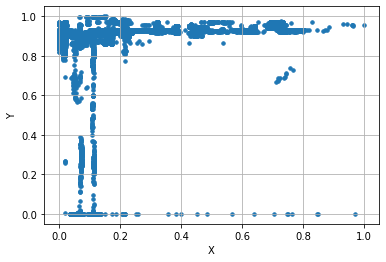

In [7]:
pd.DataFrame(np.array([x3,y]).T).plot.scatter(0, 1, s=12, grid=True)
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.show()

In [8]:
# на графике видно, что данные не коррелируют между собой

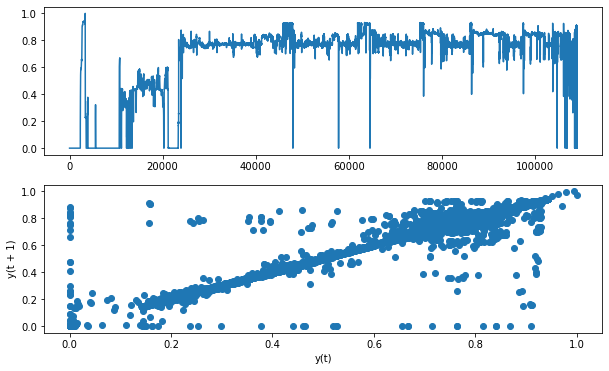

In [9]:
fig, (ax1,ax2)=pyplot.subplots(nrows=2, ncols=1, figsize=(10,6))
x1.plot(ax=ax1)
pd.plotting.lag_plot(x1)

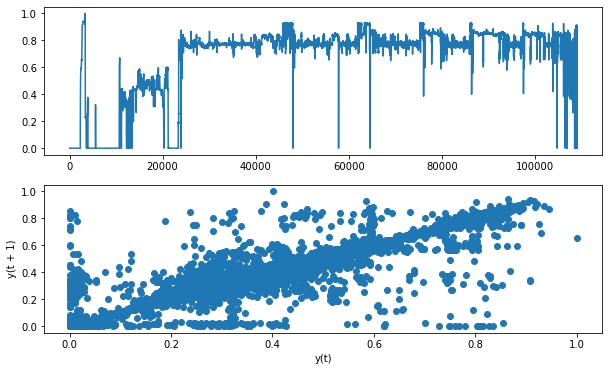

In [10]:
fig, (ax1,ax2)=pyplot.subplots(nrows=2, ncols=1, figsize=(10,6))
x1.plot(ax=ax1)
pd.plotting.lag_plot(x2)

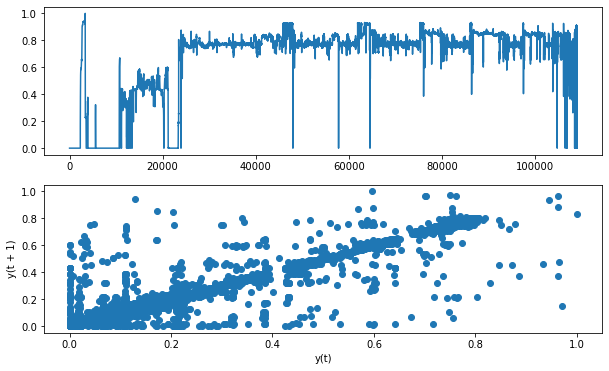

In [11]:
fig, (ax1,ax2)=pyplot.subplots(nrows=2, ncols=1, figsize=(10,6))
x1.plot(ax=ax1)
pd.plotting.lag_plot(x3)

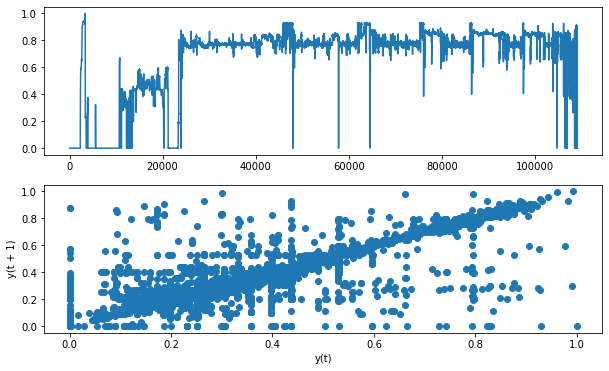

In [12]:
fig, (ax1,ax2)=pyplot.subplots(nrows=2, ncols=1, figsize=(10,6))
x1.plot(ax=ax1)
pd.plotting.lag_plot(x4)

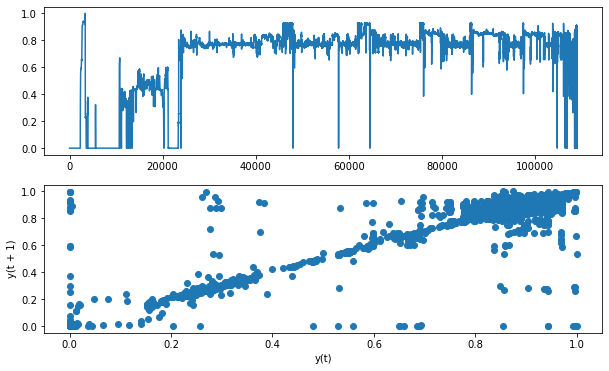

In [13]:
fig, (ax1,ax2)=pyplot.subplots(nrows=2, ncols=1, figsize=(10,6))
x1.plot(ax=ax1)
pd.plotting.lag_plot(x5)

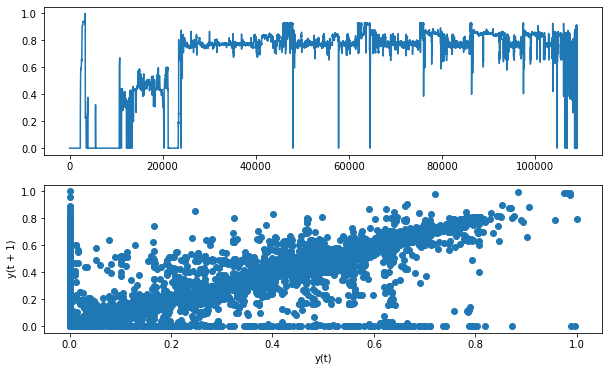

In [14]:
fig, (ax1,ax2)=pyplot.subplots(nrows=2, ncols=1, figsize=(10,6))
x1.plot(ax=ax1)
pd.plotting.lag_plot(x6)

# ARMAX модель

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

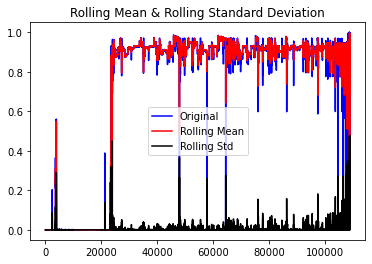

In [16]:
rolling_mean = y.rolling(window = 12).mean()
rolling_std = y.rolling(window = 12).std()
pyplot.plot(y, color = 'blue', label = 'Original')
pyplot.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
pyplot.plot(rolling_std, color = 'black', label = 'Rolling Std')
pyplot.legend(loc = 'best')
pyplot.title('Rolling Mean & Rolling Standard Deviation')
pyplot.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


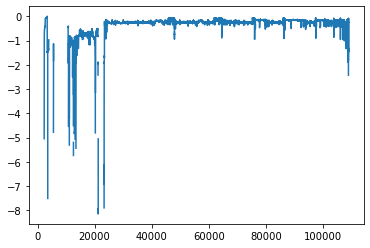

In [17]:
df_log1 = np.log(x1)
pyplot.plot(df_log1)

In [18]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = pyplot.plot(timeseries, color='blue', label='Original')
    mean = pyplot.plot(rolling_mean, color='red', label='Rolling Mean')
    std = pyplot.plot(rolling_std, color='black', label='Rolling Std')
    pyplot.legend(loc='best')
    pyplot.title('Rolling Mean & Standard Deviation')
    pyplot.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(y)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

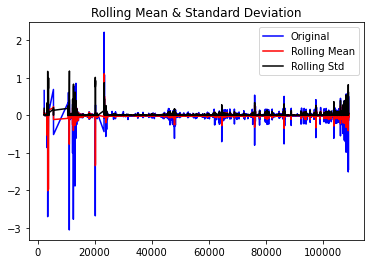

ADF Statistic: -2.083408263621768
p-value: 0.25123834405905804
Critical Values:
	1%: -3.4304100418135874
	5%: -2.8615665375648693
	10%: -2.566784125012999


In [19]:
rolling_mean = df_log1.rolling(window=12).mean()
df_log_minus_mean = df_log1 - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

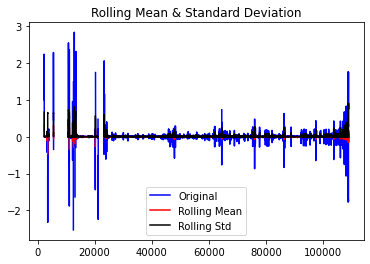

ADF Statistic: -2.083408263621768
p-value: 0.25123834405905804
Critical Values:
	1%: -3.4304100418135874
	5%: -2.8615665375648693
	10%: -2.566784125012999


In [20]:
df_log_shift = df_log1 - df_log1.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


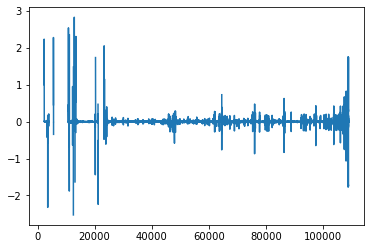

In [21]:
model = ARIMA(df_log1, order=(0,1,0))
results = model.fit(disp=0)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

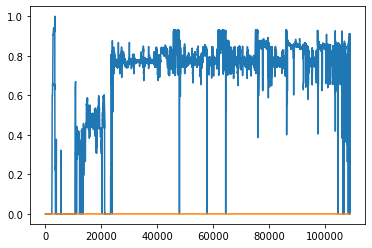

In [22]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log1.iloc[0], index=df_log1.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(x1)
plt.plot(predictions_ARIMA)

In [23]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.6   No. Observations:               108984
Model:                 ARIMA(0, 1, 0)   Log Likelihood                     nan
Method:                           css   S.D. of innovations                nan
Date:                Fri, 24 Jun 2022   AIC                                nan
Time:                        08:19:28   BIC                                nan
Sample:                             1   HQIC                               nan
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan


# VAR & VECM model

In [27]:
X_train_diff=series.diff()
X_train_diff.describe()

,6,7,8,9,10,11
count,108984.000000,1.089840e+05,1.089840e+05,108984.000000,108984.000000,108984.000000
mean,0.000007,-1.215817e-08,-2.073945e-07,0.000003,0.000008,0.000003
std,0.018683,2.746539e-02,2.092277e-02,0.026616,0.018824,0.041432
min,-0.909843,-8.329080e-01,-8.231773e-01,-0.999662,-1.000000,-0.995560
25%,-0.000894,-2.690910e-03,-9.784591e-04,-0.000140,-0.000589,-0.000618
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,0.000888,2.620772e-03,9.663955e-04,0.000152,0.000597,0.000573
max,0.885346,8.538064e-01,8.157144e-01,0.873802,0.996908,1.000000


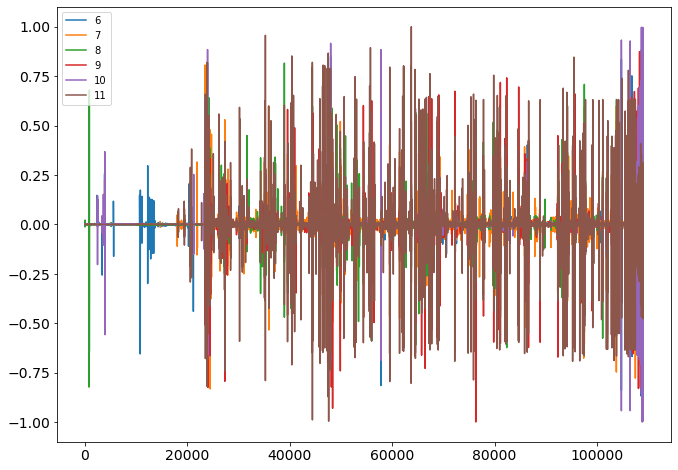

In [28]:
X_train_diff.plot(figsize=(11,8), fontsize=14)
plt.show()

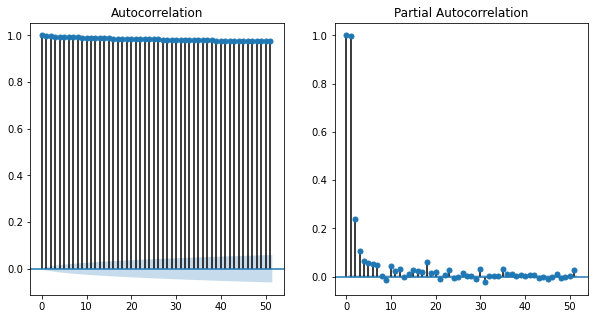

In [33]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0]=plot_acf(series['6'], ax=ax[0])
ax[1]=plot_pacf(series['6'], ax=ax[1])

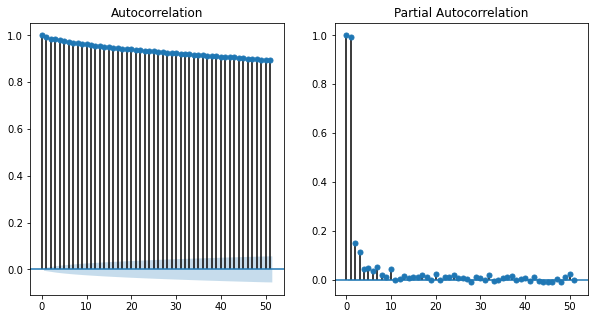

In [34]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0]=plot_acf(series['7'], ax=ax[0])
ax[1]=plot_pacf(series['7'], ax=ax[1])

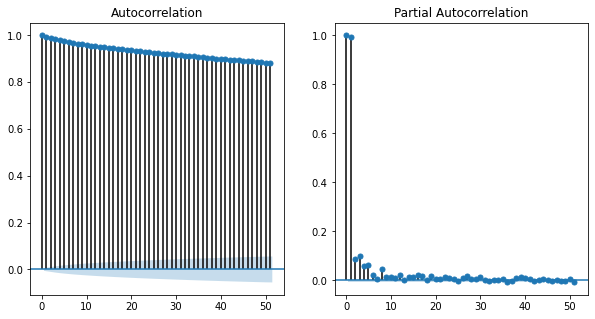

In [35]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0]=plot_acf(series['8'], ax=ax[0])
ax[1]=plot_pacf(series['8'], ax=ax[1])

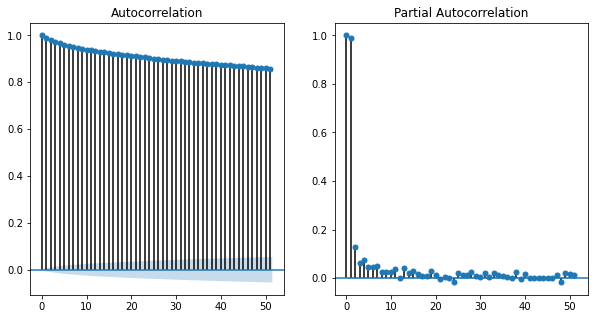

In [36]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0]=plot_acf(series['9'], ax=ax[0])
ax[1]=plot_pacf(series['9'], ax=ax[1])

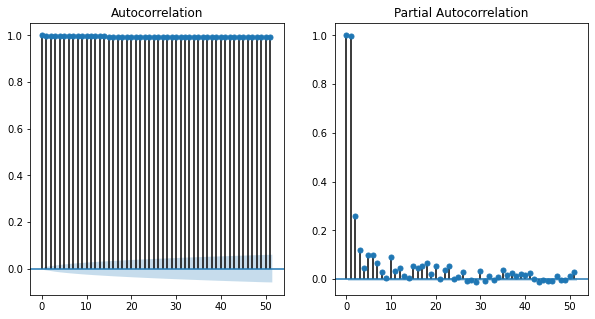

In [37]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0]=plot_acf(series['10'], ax=ax[0])
ax[1]=plot_pacf(series['10'], ax=ax[1])

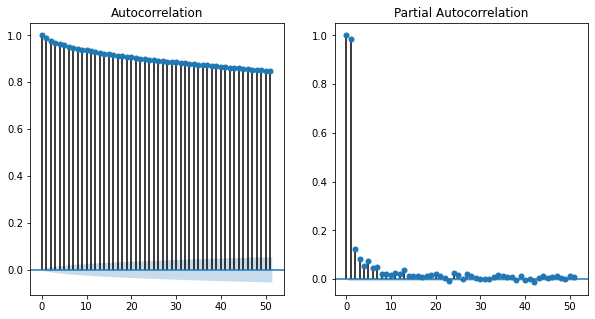

In [38]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0]=plot_acf(series['11'], ax=ax[0])
ax[1]=plot_pacf(series['11'], ax=ax[1])

In [39]:
import statsmodels.tsa as ts1

In [44]:
X_train_diff['Y'] = y
X_train_diff[X_train_diff.isna()]=0

print(ts1.stattools.grangercausalitytests(X_train_diff[['Y','6']], maxlag=15, addconst=True, verbose=True))
print(ts1.stattools.grangercausalitytests(X_train_diff[['Y','7']], maxlag=15, addconst=True, verbose=True)) 
print(ts1.stattools.grangercausalitytests(X_train_diff[['Y','8']], maxlag=15, addconst=True, verbose=True)) 
print(ts1.stattools.grangercausalitytests(X_train_diff[['Y','9']], maxlag=15, addconst=True, verbose=True)) 
print(ts1.stattools.grangercausalitytests(X_train_diff[['Y','10']], maxlag=15, addconst=True, verbose=True)) 
print(ts1.stattools.grangercausalitytests(X_train_diff[['Y','11']], maxlag=15, addconst=True, verbose=True)) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4709.6713, p=0.0000  , df_denom=108981, df_num=1
ssr based chi2 test:   chi2=4709.8009, p=0.0000  , df=1
likelihood ratio test: chi2=4610.8728, p=0.0000  , df=1
parameter F test:         F=4709.6713, p=0.0000  , df_denom=108981, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=364.6850, p=0.0000  , df_denom=108978, df_num=2
ssr based chi2 test:   chi2=729.4035, p=0.0000  , df=2
likelihood ratio test: chi2=726.9734, p=0.0000  , df=2
parameter F test:         F=364.6850, p=0.0000  , df_denom=108978, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=104.5430, p=0.0000  , df_denom=108975, df_num=3
ssr based chi2 test:   chi2=313.6491, p=0.0000  , df=3
likelihood ratio test: chi2=313.1986, p=0.0000  , df=3
parameter F test:         F=104.5430, p=0.0000  , df_denom=108975, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1801.5315, p=0.0000  , df_denom=108981, df_num=1
ssr based chi2 test:   chi2=1801.5811, p=0.0000  , df=1
likelihood ratio test: chi2=1786.8525, p=0.0000  , df=1
parameter F test:         F=1801.5315, p=0.0000  , df_denom=108981, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=274.2221, p=0.0000  , df_denom=108978, df_num=2
ssr based chi2 test:   chi2=548.4694, p=0.0000  , df=2
likelihood ratio test: chi2=547.0939, p=0.0000  , df=2
parameter F test:         F=274.2221, p=0.0000  , df_denom=108978, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=100.9503, p=0.0000  , df_denom=108975, df_num=3
ssr based chi2 test:   chi2=302.8704, p=0.0000  , df=3
likelihood ratio test: chi2=302.4503, p=0.0000  , df=3
parameter F test:         F=100.9503, p=0.0000  , df_denom=108975, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.9250 , p=0.0006  , df_denom=108981, df_num=1
ssr based chi2 test:   chi2=11.9253 , p=0.0006  , df=1
likelihood ratio test: chi2=11.9246 , p=0.0006  , df=1
parameter F test:         F=11.9250 , p=0.0006  , df_denom=108981, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.6844 , p=0.0000  , df_denom=108978, df_num=2
ssr based chi2 test:   chi2=25.3700 , p=0.0000  , df=2
likelihood ratio test: chi2=25.3671 , p=0.0000  , df=2
parameter F test:         F=12.6844 , p=0.0000  , df_denom=108978, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.4004  , p=0.0001  , df_denom=108975, df_num=3
ssr based chi2 test:   chi2=22.2026 , p=0.0001  , df=3
likelihood ratio test: chi2=22.2004 , p=0.0001  , df=3
parameter F test:         F=7.4004  , p=0.0001  , df_denom=108975, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=200.0911, p=0.0000  , df_denom=108981, df_num=1
ssr based chi2 test:   chi2=200.0967, p=0.0000  , df=1
likelihood ratio test: chi2=199.9132, p=0.0000  , df=1
parameter F test:         F=200.0911, p=0.0000  , df_denom=108981, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.2392 , p=0.0000  , df_denom=108978, df_num=2
ssr based chi2 test:   chi2=30.4799 , p=0.0000  , df=2
likelihood ratio test: chi2=30.4756 , p=0.0000  , df=2
parameter F test:         F=15.2392 , p=0.0000  , df_denom=108978, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=49.4482 , p=0.0000  , df_denom=108975, df_num=3
ssr based chi2 test:   chi2=148.3541, p=0.0000  , df=3
likelihood ratio test: chi2=148.2532, p=0.0000  , df=3
parameter F test:         F=49.4482 , p=0.0000  , df_denom=108975, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=40


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7958.1532, p=0.0000  , df_denom=108981, df_num=1
ssr based chi2 test:   chi2=7958.3723, p=0.0000  , df=1
likelihood ratio test: chi2=7681.2126, p=0.0000  , df=1
parameter F test:         F=7958.1532, p=0.0000  , df_denom=108981, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=850.0344, p=0.0000  , df_denom=108979, df_num=2
ssr based chi2 test:   chi2=1700.1312, p=0.0000  , df=2
likelihood ratio test: chi2=1687.0066, p=0.0000  , df=2
parameter F test:         F=4100.8033, p=0.0000  , df_denom=108979, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=78.4153 , p=0.0000  , df_denom=108977, df_num=3
ssr based chi2 test:   chi2=235.2566, p=0.0000  , df=3
likelihood ratio test: chi2=235.0030, p=0.0000  , df=3
parameter F test:         F=5502.9882, p=0.0000  , df_denom=108977, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:     


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.5598 , p=0.0007  , df_denom=108981, df_num=1
ssr based chi2 test:   chi2=11.5602 , p=0.0007  , df=1
likelihood ratio test: chi2=11.5595 , p=0.0007  , df=1
parameter F test:         F=11.5598 , p=0.0007  , df_denom=108981, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=20.1720 , p=0.0000  , df_denom=108978, df_num=2
ssr based chi2 test:   chi2=40.3458 , p=0.0000  , df=2
likelihood ratio test: chi2=40.3383 , p=0.0000  , df=2
parameter F test:         F=20.1720 , p=0.0000  , df_denom=108978, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=28.1645 , p=0.0000  , df_denom=108975, df_num=3
ssr based chi2 test:   chi2=84.4989 , p=0.0000  , df=3
likelihood ratio test: chi2=84.4662 , p=0.0000  , df=3
parameter F test:         F=28.1645 , p=0.0000  , df_denom=108975, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=19

In [59]:
model = VAR(endog=series)
res = model.select_order(7)
res.summary()

,AIC,BIC,FPE,HQIC
0,-21.37,-21.37,5.213e-10,-21.37
1,-45.72,-45.72,1.395e-20,-45.72
2,-45.89,-45.89,1.173e-20,-45.89
3,-45.95,-45.94,1.102e-20,-45.95
4,-45.98,-45.97,1.076e-20,-45.97
5,-46.01,-45.99,1.046e-20,-46.00
6,-46.03,-46.01,1.027e-20,-46.02
7,-46.04*,-46.02*,1.011e-20*,-46.03*


In [60]:
model_fit=model.fit(maxlags=4)
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, Jun, 2022
Time:                     08:39:55
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -45.9655
Nobs:                     108981.    HQIC:                  -45.9747
Log likelihood:       1.57773e+06    FPE:                1.07572e-20
AIC:                     -45.9787    Det(Omega_mle):     1.07424e-20
--------------------------------------------------------------------
Results for equation 6
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001322         0.000157            8.439           0.000
L1.6          0.762796         0.004860          156.947           0.000
L1.7         -0.026225         0.002140          -12.254           0.000
L1.8         -0.000883 

In [61]:
lag_order = model_fit.k_ar 
print(lag_order)

4


In [62]:
input_data = series.values[-lag_order:] 
print(input_data)

[[0.00000000e+00 1.06474693e-03 6.85043693e-02 2.70187140e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.02916503e-03 6.80519945e-02 3.37810584e-04
  0.00000000e+00 0.00000000e+00]
 [2.37973754e-01 9.94316115e-04 6.67526867e-02 2.46970625e-04
  0.00000000e+00 0.00000000e+00]
 [7.79669872e-01 0.00000000e+00 7.84915526e-02 3.04580478e-01
  8.55909966e-01 2.82116121e-01]]


In [66]:
X_train, X_test=series[0:-10], series[-10:]
pred = model_fit.forecast(y=input_data, steps=10) 
pred= (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred')) 
print(pred)

          6_pred    7_pred    8_pred    9_pred   10_pred   11_pred
108975  0.588481 -0.032474  0.086333  0.229989  0.617202  0.284275
108976  0.547688 -0.053760  0.094133  0.207560  0.562913  0.273913
108977  0.546636 -0.031895  0.097493  0.213227  0.572615  0.280121
108978  0.567217 -0.024472  0.093745  0.216770  0.589332  0.269530
108979  0.564393 -0.025061  0.093047  0.215960  0.585516  0.267298
108980  0.562942 -0.023767  0.093947  0.215241  0.584757  0.266624
108981  0.562636 -0.020016  0.094448  0.215736  0.584833  0.266687
108982  0.563429 -0.016993  0.094562  0.215810  0.585381  0.265152
108983  0.563689 -0.014361  0.094682  0.215830  0.585578  0.263727
108984  0.563882 -0.011715  0.094887  0.215808  0.585787  0.262479


In [67]:
# inverting transformation
def invert_transformation(X_train, pred_df):
        forecast = pred_df.copy()
        columns = X_train.columns
        for col in columns:
              forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col) +'_pred'].cumsum()
        return forecast

output=invert_transformation(X_train,pred)  

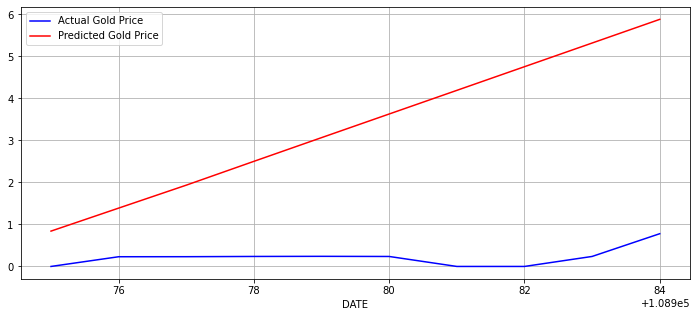

In [70]:
plt.figure(figsize=(12,5))
plt.xlabel('DATE')

ax1=X_test['6'].plot(color='blue', grid=True, label='Actual')
ax2=output['6_pred'].plot(color='red', grid=True, label='Predicted')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

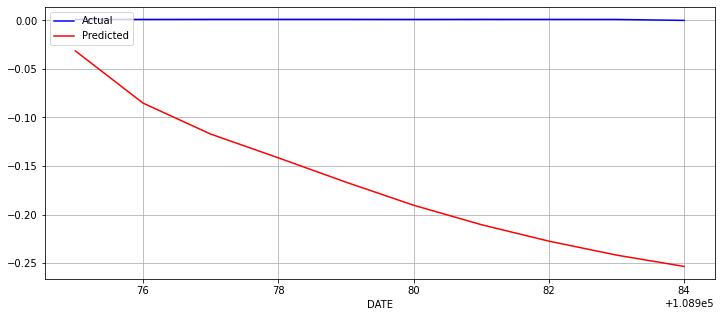

In [71]:
plt.figure(figsize=(12,5))
plt.xlabel('DATE')

ax1=X_test['7'].plot(color='blue', grid=True, label='Actual')
ax2=output['7_pred'].plot(color='red', grid=True, label='Predicted')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

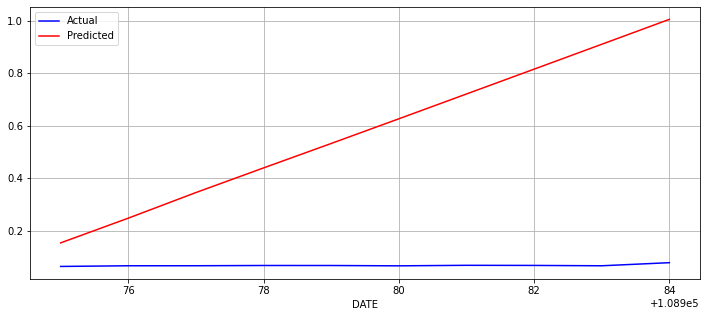

In [72]:
plt.figure(figsize=(12,5))
plt.xlabel('DATE')

ax1=X_test['8'].plot(color='blue', grid=True, label='Actual')
ax2=output['8_pred'].plot(color='red', grid=True, label='Predicted')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

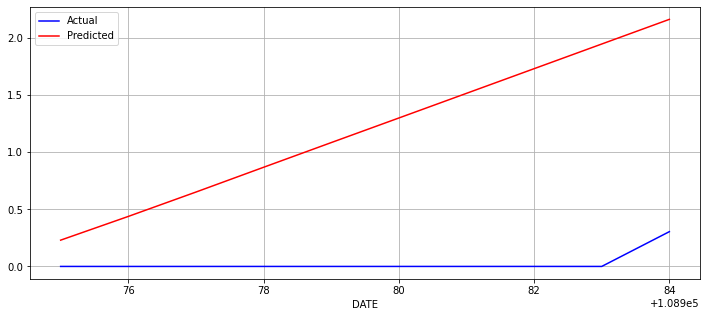

In [73]:
plt.figure(figsize=(12,5))
plt.xlabel('DATE')

ax1=X_test['9'].plot(color='blue', grid=True, label='Actual')
ax2=output['9_pred'].plot(color='red', grid=True, label='Predicted')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

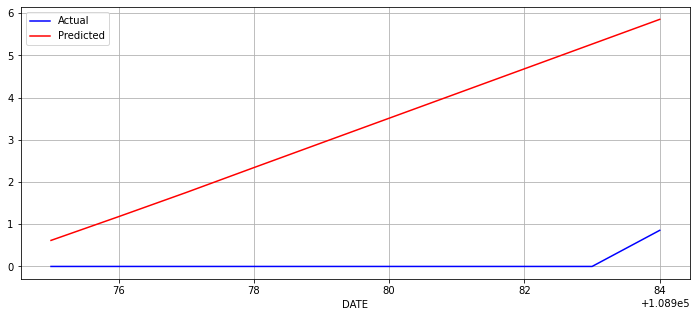

In [74]:
plt.figure(figsize=(12,5))
plt.xlabel('DATE')

ax1=X_test['10'].plot(color='blue', grid=True, label='Actual')
ax2=output['10_pred'].plot(color='red', grid=True, label='Predicted')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

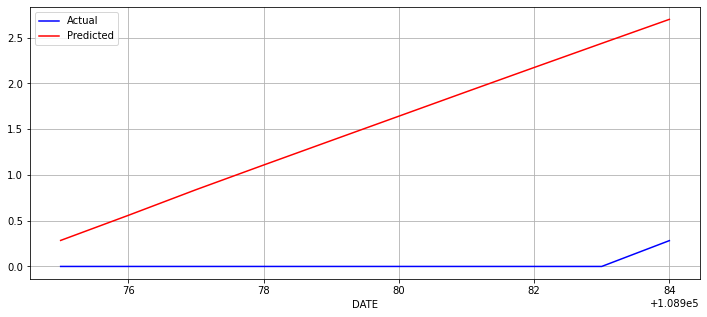

In [75]:
plt.figure(figsize=(12,5))
plt.xlabel('DATE')

ax1=X_test['11'].plot(color='blue', grid=True, label='Actual')
ax2=output['11_pred'].plot(color='red', grid=True, label='Predicted')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()